In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def test():
    p_success = 0.5
    return np.random.random() > 1 - p_success

def generate_possibilities_2d(min, max, num_points):
    nx = np.linspace(min, max, num_points)
    ny = np.linspace(min, max, num_points)
    return np.meshgrid(nx, ny)

def get_random_coordinate(n_points: int, n_dimensions: int=2):
    x = np.random.randint(0, n_points)
    y = np.random.randint(0, n_points)

    return x, y

def get_next_coordinate():
    """
    ----
    Available hyperparameters:
    - Max clusters
    - Radius proportion
    - Chance of point inside radius
    """
    return np.random.random()

Initialising random points
Calculating KNN
951 remaining coordinates


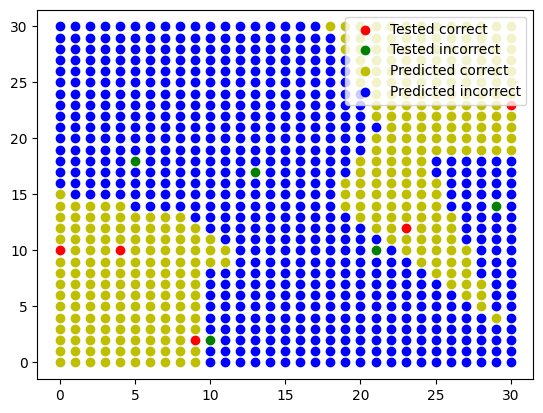

Predicting remaining datapoints


In [ ]:
NUM_POINTS = 31 # Number of values tested for each parameter
INITIALISATION_SIZE = 100
EPOCH_SIZE = 50 # Number of points to test before reclassifying predictions


# Grid is made up of NUM_POINTS x NUMPOINTS array
# output[x][y] 

xv, yv = generate_possibilities_2d(-1, 1, NUM_POINTS)

# Build list of possible coordinates
remaining_coords = set()
for x in range(NUM_POINTS):
    coords= [(x, y) for y in np.arange(NUM_POINTS)]
    for coord in coords:
        remaining_coords.add(coord)


results = -1 * np.ones( (NUM_POINTS, NUM_POINTS) )
output = []


print("Initialising random points")
for i in range(INITIALISATION_SIZE):
    x, y = get_random_coordinate(NUM_POINTS)
    while results[x,y] != -1:
        x, y = get_random_coordinate(NUM_POINTS)
    coord = (x,y)

    results[coord] = test()
    remaining_coords.remove(coord)
    output.append([x, y, results[coord]])


print("Calculating KNN")
X = np.array(output)[:, 0:2]
y = np.array(output)[:, 2]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

print("%d remaining coordinates" % len(remaining_coords))
X_test = np.array([list(x) for x in list(remaining_coords)])
y_pred = knn.predict(X_test)

# Concatenate the results
concat = np.concatenate([X_test, np.array([y_pred]).transpose()], axis=1)
# print(y_pred)
# print(np.where(concat[:,2] == 1))
pred_success = concat[np.where(concat[:,2] == 1)]
pred_fail = concat[np.where(concat[:,2] == 0)]

plt.figure()
correct = np.where([results == 1])
correct_x = correct[1]
correct_y = correct[2]

incorrect = np.where([results == 0])
incorrect_x = incorrect[1]
incorrect_y = incorrect[2]

plt.scatter(correct_x, correct_y, color='r')
plt.scatter(incorrect_x, incorrect_y, color='g')
plt.scatter(pred_success[:,0], pred_success[:,1], color='y')
plt.scatter(pred_fail[:,0], pred_fail[:,1], color='b')
plt.legend(['Tested correct', 'Tested incorrect', 'Predicted correct', 'Predicted incorrect'])
plt.show()
print("Predicting remaining datapoints")

# print(y_pred == 1)


{0.21249517043306976, 0.3489238359723651, 0.4649955903465387, 0.685920372325929, 0.46964372587918457, 0.02187165326513918, 0.7109268068565371, 0.7096153908458992, 0.5368017238553946, 0.2131740533198193, 0.8182378964729261, 0.43726790542749694, 0.8974821586964499, 0.8319353284865282, 0.2938329363354698, 0.05867956547123032, 0.34212982104967093, 0.9018406053090067, 0.15337805350189826, 0.7384288765278415, 0.5824831377859127, 0.5719929361359298, 0.07494085364957781, 0.25762081655490165, 0.22132724998855358, 0.29512695820035795, 0.08819717347030931, 0.19300419666730662, 0.5986878060207796, 0.773475430677199, 0.7381673038285709, 0.43481927214671756, 0.4733897720756638, 0.008572836646378756, 0.9548442784082728, 0.2140701286788369, 0.3778180821267858, 0.37670055741403907, 0.06312130977226282, 0.5980958995090183, 0.9877118105104714, 0.8817558256263246, 0.9481601543455594, 0.9544478735223633, 0.16181835217399154, 0.15268829200404488, 0.44486212203344655, 0.4530028190784754, 0.7146707773178007, 

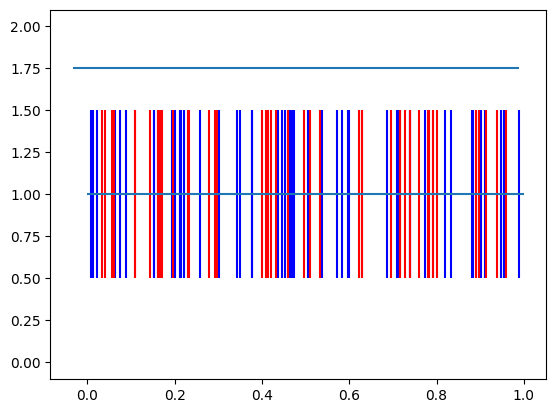

In [11]:
success_coords = set()
fail_coords = set()

for i in range(100):
    coordinate = get_next_coordinate()
    is_success = test()

    if is_success:
        success_coords.add(coordinate)
    else:
        fail_coords.add(coordinate)
print(success_coords)
print(fail_coords)

success_arr = np.array(list(success_coords))
radius = np.abs((success_arr - success_arr.mean())).max()

fail_arr = np.array(list(fail_coords))

print("Mean:", success_arr.mean())
print("Radius:", radius)

plt.figure()
plt.eventplot(success_arr, orientation='horizontal', colors='b')
plt.eventplot(fail_arr, orientation='horizontal', colors='r')
# plt.eventplot([success_arr.mean(), success_arr.mean()-radius, success_arr.mean()+radius], orientation='horizontal', colors='r')

plt.hlines(1,0,1)
plt.hlines(1.75,success_arr.mean()-radius, success_arr.mean()+radius)

plt.show()